In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\syuhe\\Downloads\\アーカイブ\\data_file\\csv\\prepared_cm-item-cm101.csv", dtype=str)
df = df.loc[:, 'note':'price_remarks']

In [3]:
df.head()

,note,name,label,brand,creater,publish_date,language,page,position,publisher,size,volume,alterate_name,series,description,version,price,price_tax_info,price_tax_included,price_remarks
0,NaN,"[{'@language': 'ja-hrkt', '@value': 'センノメセンセイ'...",千の目先生 2 ／ 第2巻,NaN,"['[著]石森章太郎', {'@language': 'ja-hrkt', '@value'...",1970/12/15,日本語,223p,2,朝日ソノラマ ∥ アサヒソノラマ,20cm × 13cm,2 ／ 第2巻,NaN,NaN,"千の目先生,青い馬,鋏〈はさみ〉",NaN,450,FALSE,NaN,NaN
1,NaN,"[{'@language': 'ja-hrkt', '@value': 'ユメ ノ サンポ'...",夢の散歩,"['カスタム・コミックス', {'@language': 'ja-hrkt', '@valu...",[著]つげ義春,1981/6/25,日本語,192p ／ 190p,1,日本文芸社 ∥ ニホン ブンゲイシャ,18.2cm × 12.8cm ／ 19cm,NaN,NaN,NaN,"夢の散歩,事件,懐かしいひと,夏の思い出,ねじ式,庶民御宿,紅い花,下宿の頃,外のふくらみ",NaN,500,FALSE,NaN,NaN
2,NaN,"[{'@language': 'ja-hrkt', '@value': 'サロメノクチビル'...",サロメの唇,"[{'@language': 'ja-hrkt', '@value': 'セイリン ケッサク...","['[著]手塚治虫', {'@language': 'ja-hrkt', '@value':...",1979/8/5,日本語,238p,1,青林堂 ∥ セイリンドウ,20cm × 14cm,NaN,NaN,NaN,"ペーター・キュルテンの記録,サロメの唇,イエロー・ダスト,最上殿始末,火の山,付: ちかごろ...",NaN,1200,FALSE,NaN,NaN
3,NaN,"[{'@language': 'ja-hrkt', '@value': 'ナキガハラ'}, ...",泣き原,"[{'@language': 'ja-hrkt', '@value': 'ビッグ コミックス...","['[著]白土三平/赤目プロ', {'@language': 'ja-hrkt', '@va...",1982/7/1,日本語,222p,1,小学館 ∥ ショウガクカン,18.2cm × 12.8cm,NaN,"['女星シリーズ', {'@language': 'ja-hrkt', '@value': ...",白土三平異色作品集16,"泣き原,犬狩り",NaN,480,FALSE,NaN,NaN
4,NaN,"['忍者旋風 風魔忍風伝', {'@language': 'ja-hrkt', '@valu...",忍者旋風 風魔忍風伝 3,"ダイヤモンドコミックス,KODAMA DIAMOND COMICS","['[著]白土三平', {'@language': 'ja-hrkt', '@value':...",1967/3/15,NaN,219p,3,コダマプレス,17.3cm × 10.6cm ／ 18cm,3,"['忍の巻', {'@language': 'ja-hrkt', '@value': 'ニン...",NaN,"人の変化,砂の変化,天の変化,光の変化,獣の変化",NaN,240,FALSE,NaN,NaN


In [4]:
df = df[['page', 'position','size','volume','price']]

In [5]:
def preprocessing(df):
    # ページ数
    df['page'] = df['page'].str[:3]
    df['page'] = df['page'].str.extract(r'(\d{3})')
    df['page'] = pd.to_numeric(df['page'], errors='coerce')

    
    # サイズ
    df['size'] = df['size'].str[:3]
    df['size'] = df['size'].apply(lambda x: re.sub(r'\D', '', x))
    df['size'] = pd.to_numeric(df['size'], errors='coerce')
    
    # 巻数
    df['volume'] = df['volume'].apply(lambda x: re.sub(r'\D', '', str(x)))  # ここでは文字列に変換してから正規表現を適用
    df['volume'] = pd.to_numeric(df['volume'], errors='coerce')
    
    # ' を削除
    df.replace("'", '', regex=True, inplace=True)
    
    return df

In [6]:
# 4000行目までを訓練データとする
train_df = df.iloc[:4000]

# 4000行目以降をテストデータとする
test_df = df.iloc[4000:]

In [7]:
train_df1 = preprocessing(train_df)
test_df1 = preprocessing(test_df)
train_df1.head()

,page,position,size,volume,price
0,223.0,2,20,22.0,450
1,192.0,1,18,NaN,500
2,238.0,1,20,NaN,1200
3,222.0,1,18,NaN,480
4,219.0,3,17,3.0,240


In [8]:
# float64に変換
train_df['page'] = train_df['page'].astype(float)
train_df['position'] = train_df['position'].astype(float)
train_df['size'] = train_df['size'].astype(float)
train_df['price'] = train_df['price'].astype(float)
train_df['volume'] = train_df['volume'].astype(float)

In [9]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   page      3400 non-null   float64
 1   position  3971 non-null   float64
 2   size      4000 non-null   float64
 3   volume    3632 non-null   float64
 4   price     3998 non-null   float64
dtypes: float64(5)
memory usage: 156.4 KB


In [10]:
train_df1.isnull().sum()

page        600
position     29
size          0
volume      368
price         2
dtype: int64

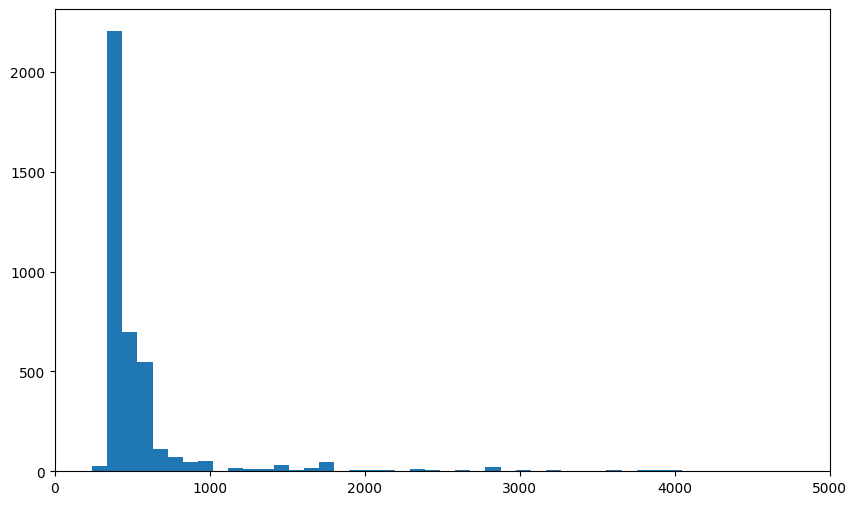

In [11]:
#訓練データ関して
# 'not available' を NaN に置換し、列を数値に変換
train_df['price'] = pd.to_numeric(train_df['price'].replace('not available', pd.NA), errors='coerce')

# プロット
plt.figure(figsize=(10, 6))
plt.hist(train_df['price'].dropna(), bins=100)
plt.xlim(0, 5000)  # x 軸の上限を 5000 に設定
plt.show()

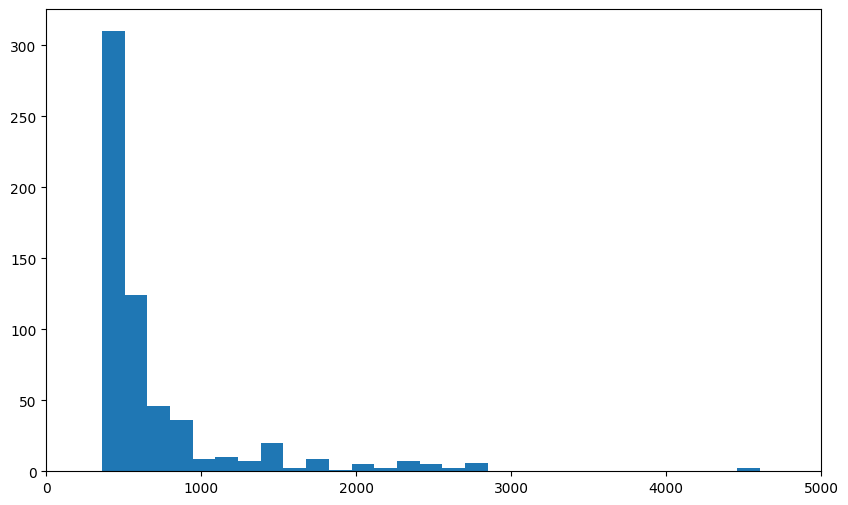

In [12]:
#テストデータ関して
# 'not available' を NaN に置換し、列を数値に変換
test_df['price'] = pd.to_numeric(test_df['price'].replace('not available', pd.NA), errors='coerce')

# プロット
plt.figure(figsize=(10, 6))
plt.hist(test_df['price'].dropna(), bins=100)
plt.xlim(0, 5000)  # x 軸の上限を 5000 に設定
plt.show()

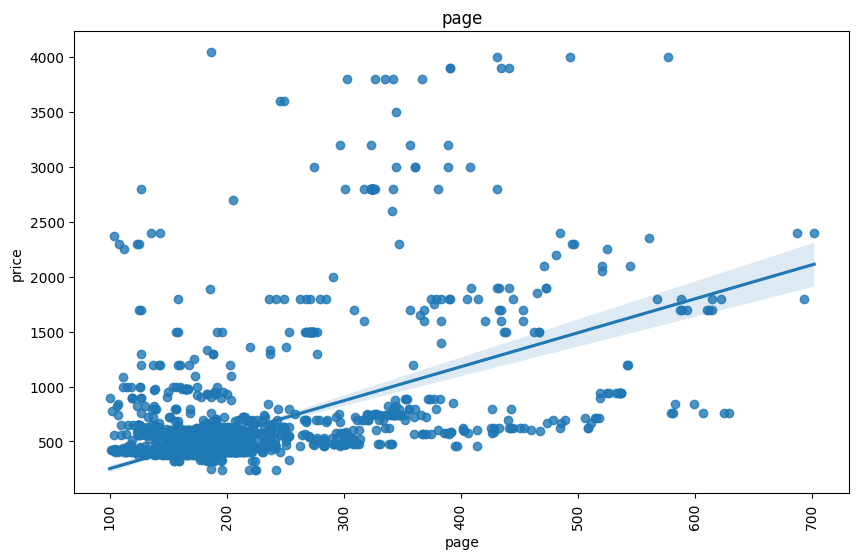

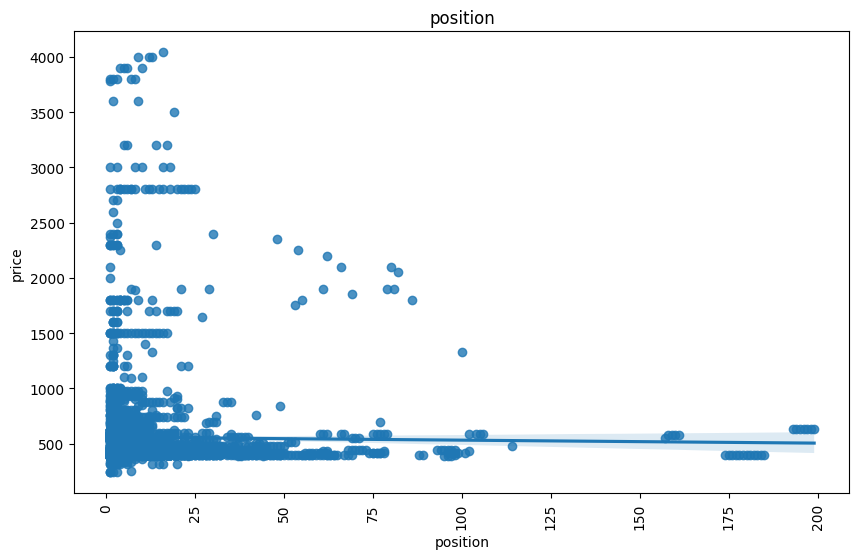

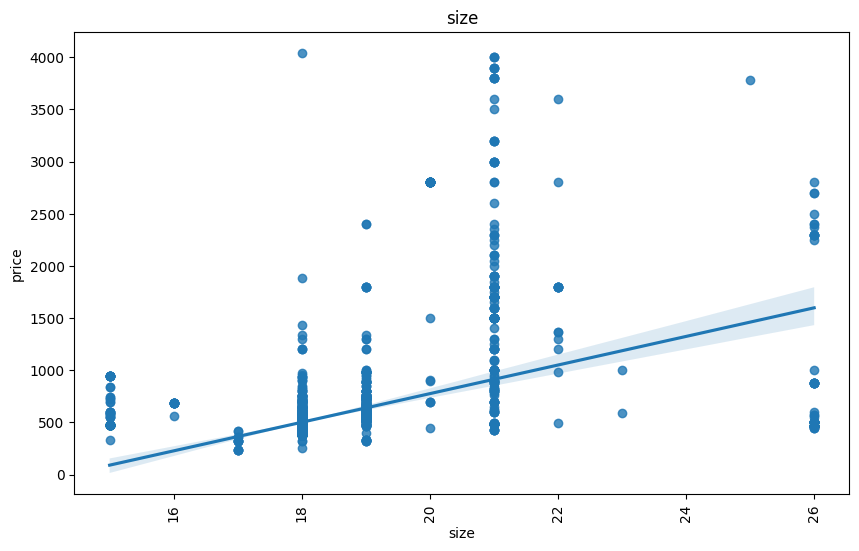

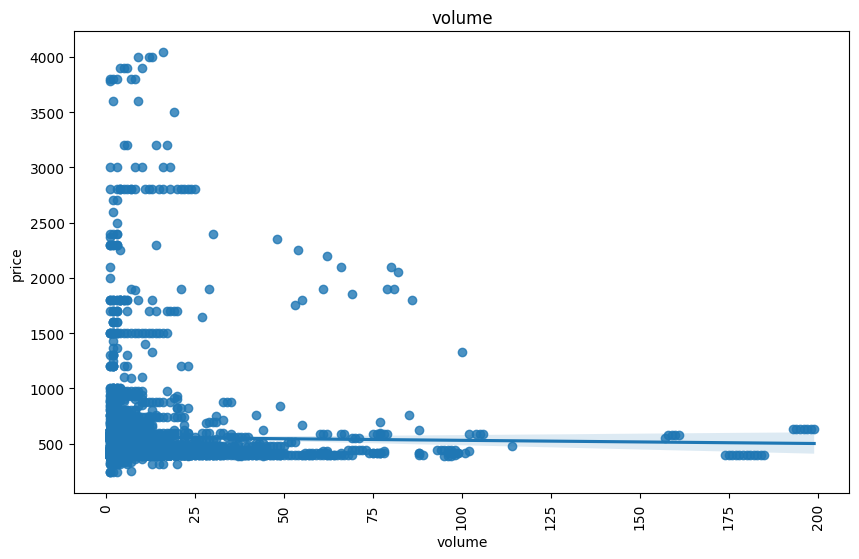

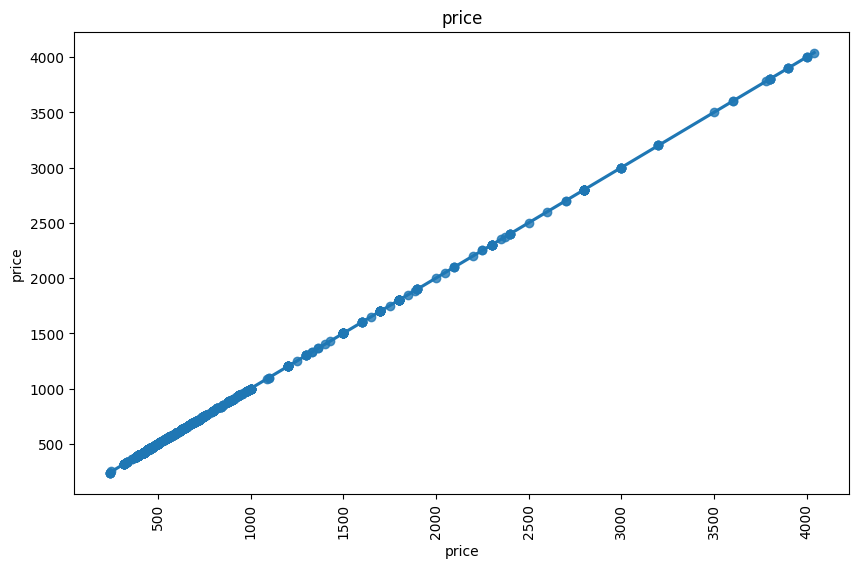

In [17]:
#外れ値の削除
train_df1 = train_df1[(train_df1['volume'] >= 0) & (train_df1['volume'] <= 200)]

# num_listを数値の列だけでなく、順序型のカテゴリカル変数も含める場合
num_list = [col for col in train_df1.columns if train_df1[col].dtype.name in ['float64', 'category']]

for i in num_list:
    plt.figure(figsize=(10, 6))
    
    # カテゴリカル変数が順序型でない場合、.as_ordered()を使用して順序型に変換
    if train_df1[i].dtype.name == 'category' and not train_df1[i].cat.ordered:
        train_df1[i] = train_df1[i].cat.as_ordered()
    
    sns.regplot(x=i, y="price", data=train_df1)
    plt.title(i)
    plt.xticks(rotation=90)

plt.show()

<Axes: >

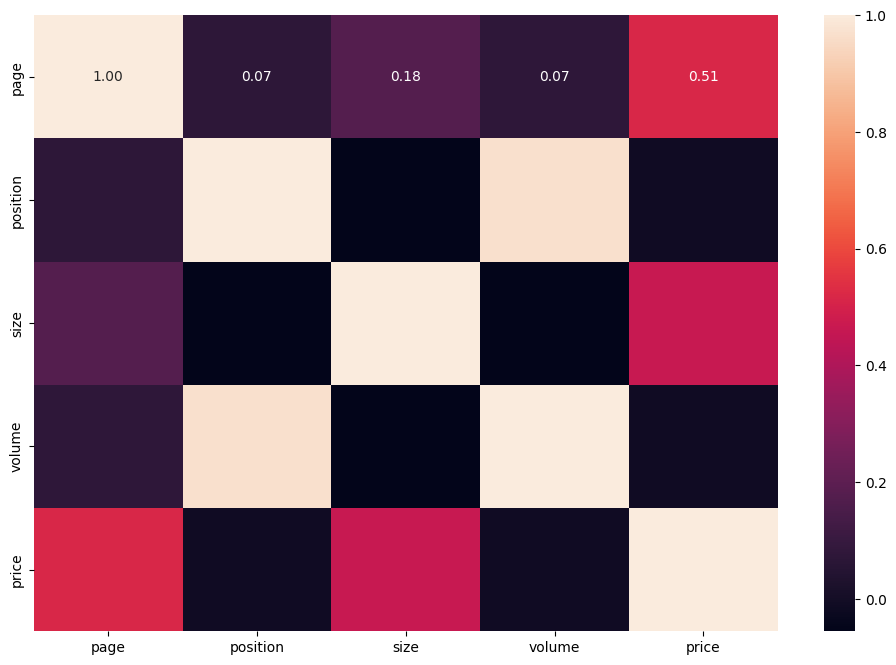

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df1.corr(), annot=True, fmt='.2f')